<a href="https://colab.research.google.com/github/Anudivya-Geddada/Sentiment-analysis-on-Twitter-data/blob/main/sentiment_analysis_and_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Extraction
Install snscrape library and import all the necessray libraries

In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.8 MB/s eta 0:00:00


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [3]:
query = "ATMANIRBHAR BHARAT ABHIYAN"
tweets=[]
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets)==500:
    break
  else:
    tweets.append(tweet.content)
print(len(tweets))

<ipython-input-3-704803b2ee8a>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append(tweet.content)


84


In [4]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Tweets'])
df.head()


,Tweets
0,"Modi @9\n9 Years of Sewa, Sushasan, & Garib Ka..."
1,"Here are ....\n\n1. Swachh Bharat Abhiyan (""Cl..."
2,The Atmanirbhar Bharat Abhiyan has encouraged ...
3,The Atmanirbhar Bharat Abhiyan has encouraged ...
4,The Atmanirbhar Bharat Abhiyan has encouraged ...


In [5]:
df.to_csv('data.csv')

#Data Cleaning
As the Extracted is Noisy,So we need to perform Data Cleaning.

1.Remove emojis
2.Remove Hashtags and urls
3.Removing all the symbols etc..

In [8]:
import re
def remove_emojis(tweets):
    l=[]
    h=[]
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    for i in tweets:
      m=re.sub(r'http\S+', '',i) #remove links
      k=re.sub(r'@\S+' , '',m) #remove mentions
      n=re.sub(r'#\S+' , '',k) #remove hashtags
      z=re.sub(r'\n\d','',n) #remove delimeters
      l.append(re.sub(emoj, '', z)) #remove emojis
    return l



In [11]:
clean_text=remove_emojis(tweets)
for i in clean_text:
  print(i)

Modi  Years of Sewa, Sushasan, & Garib Kalayan..!!

Sampark Se Samarthan...!!

As part of Modi  Jansampark Abhiyan Visited Gayatri College, Gurajada Educational Society at Srikakulam & interacted with students on the topic of Atmanirbhar Bharat and guided them about Prime Minister  ji govt's policies and comprehensive efforts to achieve the goal of Atmanirbhar Bharat.

Gayatri College President & Secretary GV Swamy Naidu, BJP State General Secretary Suryanarayana Raju, BJYM State President Kethineni Surendra Mohan, State President ST Morcha Kurusa Uma Maheshwararao, Srikakulam District president B Uma Maheshwarrao, State Executive Member Attada Ravi babji, State Secretary Uma Mahaeshwari, State Vice President Paidi Venugopal Rao, State Secretary Uma Mahaeshwari, State spokesperson Kudi Tirapaturao, BJP Padadhikaris & Students were present.


Here are ....
. Swachh Bharat Abhiyan ("Clean India"). Pradhan Mantri Kaushal Vikas Yojana (PMKVY). Make in India. Jan Dhan Yojana. Mann Ki Baat. 

2.To remove Punctuations and Stopwords use the nltk in NLP

In [9]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


...Removing punctuations and stopwords in noisy text

In [12]:
def remove_punctuation(sentence):
  for i in sentence:
    if i in string.punctuation:
      sentence = sentence.replace(i, "")
  return sentence
def remove_stopwords(sentence):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(example_sent)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence
filter_text=[]
for i in clean_text:
  example_sent = remove_punctuation(i)
  example_sent = " ".join(remove_stopwords(example_sent))
  print(example_sent)
  filter_text.append(example_sent)



Modi Years Sewa Sushasan Garib Kalayan Sampark Se Samarthan As part Modi Jansampark Abhiyan Visited Gayatri College Gurajada Educational Society Srikakulam interacted students topic Atmanirbhar Bharat guided Prime Minister ji govts policies comprehensive efforts achieve goal Atmanirbhar Bharat Gayatri College President Secretary GV Swamy Naidu BJP State General Secretary Suryanarayana Raju BJYM State President Kethineni Surendra Mohan State President ST Morcha Kurusa Uma Maheshwararao Srikakulam District president B Uma Maheshwarrao State Executive Member Attada Ravi babji State Secretary Uma Mahaeshwari State Vice President Paidi Venugopal Rao State Secretary Uma Mahaeshwari State spokesperson Kudi Tirapaturao BJP Padadhikaris Students present
Here Swachh Bharat Abhiyan Clean India Pradhan Mantri Kaushal Vikas Yojana PMKVY Make India Jan Dhan Yojana Mann Ki Baat Ayushman Bharat Digital India Atmanirbhar Bharat Trippal Talaq0 Online Payments1 Ujwala Yojana3 Housing
The Atmanirbhar Bhar

So Here is the final text after removing all the noisy data.....

##Sentiment Analysis

In [13]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00


The resultant tweets contains all the retweets. so Remove all the retweets

In [14]:
set_text=set(filter_text)
final_text=[]
for i in set_text:
  if len(i)==0:
    pass
  else:
    final_text.append(i)


Installing VADERSENTIMENT model for sentiment analysis

In [15]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
positive=[]
negative=[]
neutral=[]
sid_obj = SentimentIntensityAnalyzer()
def sentiment_scores(sentence):
  sentiment_dict = sid_obj.polarity_scores(sentence)
  if sentiment_dict['compound'] >= 0.05 :
    positive.append(sentence)
  elif sentiment_dict['compound'] <= - 0.05 :
    negative.append(sentence)
  else :
    neutral.append(sentence)
for i in final_text:
  sentence = i
  sentiment_scores(sentence)


Percentages of all the labeled classes

In [17]:
len_pos=len(positive)
len_neg=len(negative)
len_neut=len(neutral)

In [18]:
pos_perc=(len_pos/(len_pos+len_neg+len_neut))*100
neg_perc=(len_neg/(len_pos+len_neg+len_neut))*100
neut_perc=(len_neut/(len_pos+len_neg+len_neut))*100
print("Positive tweets : ",pos_perc)
print("Negative tweets : ",neg_perc)
print("Neutral tweets : ",neut_perc)


Positive tweets :  66.66666666666666
Negative tweets :  8.695652173913043
Neutral tweets :  24.637681159420293


In [19]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Plotting the percentages of positive negative and neutral tweets

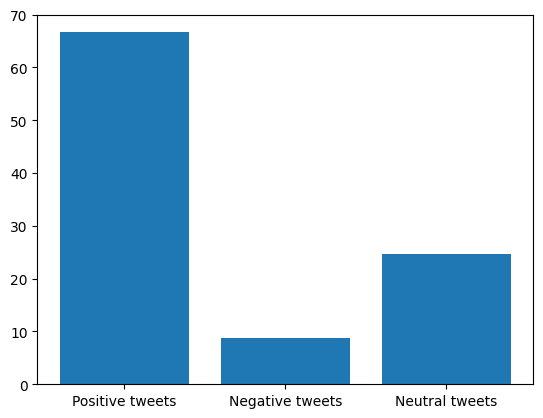

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["Positive tweets","Negative tweets","Neutral tweets"])
y = [pos_perc,neg_perc,neut_perc]
plt.bar(x,y)
plt.show()

**-->The total of positive tweets percentage is higher than negative and neutral, so we can say that most of the opinions are positive about Atmanirbhar Bharat Scheme<--**.

##Summarization

In [26]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
punctuation = punctuation + '\n'
from heapq import nlargest

In [28]:
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')

In [29]:
def summ(text):
  doc = nlp(text)
  tokens = [token.text for token in doc]
  word_frequencies = {}
  for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
  max_frequency = max(word_frequencies.values())
  for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
  sentence_tokens = [sent for sent in doc.sents]
  sentence_scores = {}
  for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
  select_length = int(len(sentence_tokens)*0.1)
  summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
  final_summary = [word.text for word in summary]
  summary = ' '.join(final_summary)
  return summary

In [30]:
len(positive)

46

In [31]:
len(negative)

6

In [32]:
len(neutral)

17

In [33]:
n=len(positive)//2
poe=[]
for i in range(n):
  poe.append(positive[i])
lo="".join(poe)
k=summ(lo)

In [34]:
poe=[]
for i in range(n+1,len(positive)):
  poe.append(positive[i])
lo="".join(poe)
p=summ(lo)


In [35]:
print(k+p)


Removing article 370A strong india feared many nationsAtmanirbhar BharatGive orders 2 surgical strike pakistan Ghar mai ghus ke maarengeMaking strong relation russiaUsaIsraeletc manyThe Atmanirbhar Bharat Abhiyan Government India GoI aimed limiting import dependence increasing demand indigenous products also provides better growth opportunities company Further TNL ’ application designled productionLatestEven onceinacentury crisis took path reformsIndia path reform transform amp perform since 2014Atmanirbhar Bharat Abhiyan imparted greater momentum As resultIndia become attractive destination investment PMCongraulationsAwasthi Jiunder PMs vision IFFCO RampD shatters 5 nanometer particle size Nanu Urea current 20 nanometer size made India Atmanirbhar Bharat Abhiyan IFFCO India GlobeNatural Capital Corporation Canada offering patented hydropyrolysis technology Indian communities fully funded program accomplishing Bharat swachh Abhiyan Atmanirbhar Bharat Debt free This initiative aims prom

In [36]:
lo="".join(negative)
j=summ(lo)
print(j)


In [37]:
n=len(neutral)//2
poe=[]
for i in range(n):
  poe.append(neutral[i])
lo="".join(poe)
u=summ(lo)

In [38]:
poe=[]
for i in range(n+1,len(neutral)):
  poe.append(neutral[i])
lo="".join(poe)
v=summ(lo)


In [39]:
print(u+v)

In [40]:
import pandas as pd
df1 = pd.DataFrame(final_text, columns=['Tweet'])
df1.head()

,Tweet
0,C Part Economic StimulusII Atmanirbhar Bharat ...
1,urban landscapes The Atmanirbhar Bharat Abhiya...
2,9 years Modi amp 9 reasons Ill vote 2024 370 A...
3,5 Atmanirbhar Bharat Abhiyan This initiative a...
4,India path “ reform transform perform ” since ...


In [41]:
df1.to_csv('tweets.csv')

###WordCloud

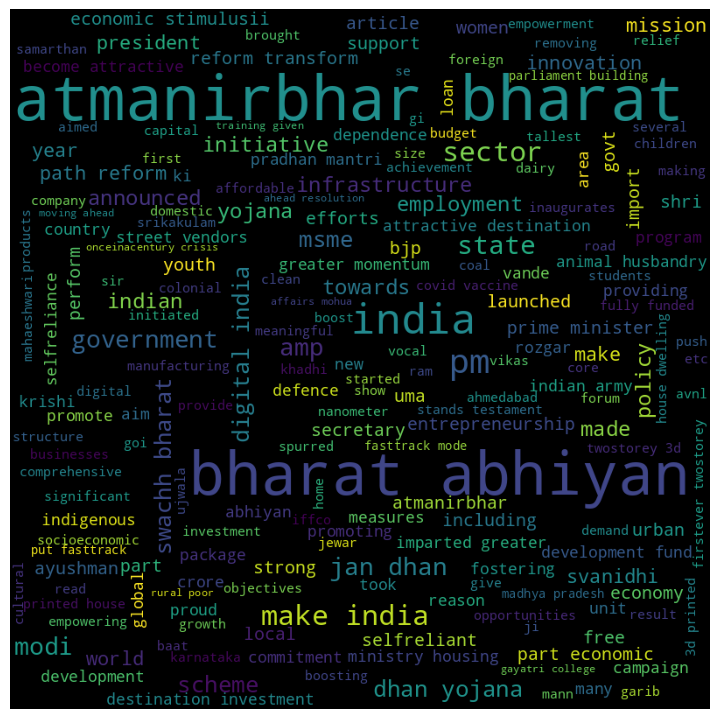

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"tweets.csv", encoding ="UTF-8")
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Tweet:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='black',
				stopwords = stopwords,
				min_font_size = 8).generate(comment_words)
plt.figure(figsize = (7, 7), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

###Topic Modelling

Installing BERTTOPIC model to do Topic Modelling

In [43]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541985 sha256=45f03786fb54a2ec25f96dc811131b45024486ce820ff5d6cb8e336be679a9

In [44]:
from bertopic import BERTopic
import json
import pandas as pd


In [45]:
df = pd.read_csv("tweets.csv")

In [46]:
df.head(5)

,Unnamed: 0,Tweet
0,0,C Part Economic StimulusII Atmanirbhar Bharat ...
1,1,urban landscapes The Atmanirbhar Bharat Abhiya...
2,2,9 years Modi amp 9 reasons Ill vote 2024 370 A...
3,3,5 Atmanirbhar Bharat Abhiyan This initiative a...
4,4,India path “ reform transform perform ” since ...


In [47]:
df.groupby('Tweet').describe()

Unnamed: 0                  \
                                                        count  mean std   min   
Tweet                                                                           
1 Make india Swachh bharat abhiyan Removing art...        1.0  16.0 NaN  16.0   
10 Best Things Modi Government Has Done So Far ...        1.0  29.0 NaN  29.0   
4 First time India private company make militar...        1.0  50.0 NaN  50.0   
5 Atmanirbhar Bharat Abhiyan This initiative ai...        1.0   3.0 NaN   3.0   
57PM SVANidhi Scheme The scheme announced part ...        1.0   6.0 NaN   6.0   
...                                                       ...   ...  ..   ...   
inaugurates firstever twostorey 3D Printed Hous...        1.0  39.0 NaN  39.0   
initiatives like Atmanirbhar Bharat Abhiyan Ski...        1.0  45.0 NaN  45.0   
sir We excited new parliament building It table...        1.0   8.0 NaN   8.0   
urban landscapes The Atmanirbhar Bharat Abhiyan...        1.0   1.0 NaN   1.0   
years 9 achievement Modi Sarkar • Swaccha Bhara...        1.0  42.0 NaN  42.0   

                                                                            
                                                     25%   50%   75%   max  
Tweet                                                                       
1 Make india Swachh bharat abhiyan Removing art...  16.0  16.0  16.0  16.0  
10 Best Things Modi Government Has Done So Far ...  29.0  29.0  29.0  29.0  
4 First time India private company make militar...  50.0  50.0  50.0  50.0  
5 Atmanirbhar Bharat Abhiyan This initiative ai...   3.0   3.0   3.0   3.0  
57PM SVANidhi Scheme The scheme announced part ...   6.0   6.0   6.0   6.0  
...                                                  ...   ...   ...   ...  
inaugurates firstever twostorey 3D Printed Hous...  39.0  39.0  39.0  39.0  
initiatives like Atmanirbhar Bharat Abhiyan Ski...  45.0  45.0  45.0  45.0  
sir We excited new parliament building It table...   8.0   8.0   8.0   8.0  
urban landscapes The Atmanirbhar Bharat Abhiyan...   1.0   1.0   1.0   1.0  
years 9 achievement Modi Sarkar • Swaccha Bhara...  42.0  42.0  42.0  42.0  

[69 rows x 8 columns]

In [48]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")



In [49]:
topics, probs = topic_model.fit_transform(final_text)


In [50]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,36,-1_bharat_abhiyan_atmanirbhar_india,"[bharat, abhiyan, atmanirbhar, india, pm, the,...",[PM SVANidhi The Ministry Housing Urban Affair...
1,0,20,0_atmanirbhar_abhiyan_bharat_the,"[atmanirbhar, abhiyan, bharat, the, government...",[Atmanirbhar Bharat Abhiyan Atmanirbhar Bharat...
2,1,13,1_bharat_india_yojana_state,"[bharat, india, yojana, state, atmanirbhar, di...",[Modi Years Sewa Sushasan Garib Kalayan Sampar...


In [51]:
topic_model.get_topic(topic=0)


[('atmanirbhar', 0.12037538388660685),
 ('abhiyan', 0.11302818750479252),
 ('bharat', 0.10684679709617544),
 ('the', 0.06089009088348764),
 ('government', 0.05790213256075483),
 ('towards', 0.04795854208535306),
 ('program', 0.04151205223236655),
 ('support', 0.03920764930152047),
 ('selfreliant', 0.03920764930152047),
 ('including', 0.03920764930152047)]

In [52]:
topic_model.visualize_barchart()

In [53]:
topic_model.visualize_heatmap()

In [55]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from textblob import TextBlob
pol=[]
sun=[]
for i in tweets:
  res = TextBlob(i)
  k=res.sentiment
  sun.append(round(k[1],2))
  p=res.sentiment.polarity
  pol.append(round(p,2))

In [57]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,Tweets
0,0,"Modi @9\n9 Years of Sewa, Sushasan, & Garib Ka..."
1,1,"Here are ....\n\n1. Swachh Bharat Abhiyan (""Cl..."
2,2,The Atmanirbhar Bharat Abhiyan has encouraged ...
3,3,The Atmanirbhar Bharat Abhiyan has encouraged ...
4,4,The Atmanirbhar Bharat Abhiyan has encouraged ...


In [58]:
data['Polarity']=pol
data['Subjectivity']=sun


In [59]:
data.head(12)

,Unnamed: 0,Tweets,Polarity,Subjectivity
0,0,"Modi @9\n9 Years of Sewa, Sushasan, & Garib Ka...",0.10,0.25
1,1,"Here are ....\n\n1. Swachh Bharat Abhiyan (""Cl...",0.18,0.35
2,2,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00
3,3,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00
4,4,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00
5,5,"The remarkable progress of the Indian economy,...",0.32,0.32
6,6,and urban landscapes. The Atmanirbhar Bharat A...,0.07,0.10
7,7,Dairy schemes\nDAIRY INFRASTRUCTURE. DEVELOPME...,0.00,0.25
8,8,🔹Pradhan Mantri Atmanirbhar Bharat Abhiyan (AB...,0.00,0.00
9,9,@pintukirtijain1 @ranakshrana @Kesariya_Meenu ...,0.10,0.10


In [60]:
data.shape

(84, 4)

In [61]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(data[['Polarity','Subjectivity']])
df_scale = pd.DataFrame(scale, columns = ['Polarity','Subjectivity']);
df_scale.head(5),


(   Polarity  Subjectivity
 0  0.406780          0.25
 1  0.474576          0.35
 2  0.322034          0.00
 3  0.322034          0.00
 4  0.322034          0.00,)

In [63]:
K=range(1,20)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

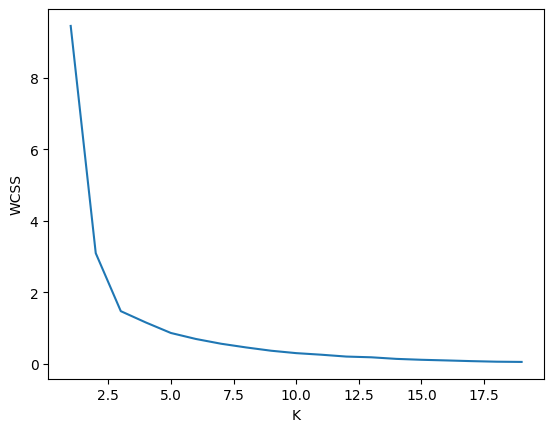

In [64]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(K,wss)

In [65]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['Polarity','Subjectivity']])
y_predicted

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2,
       1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<Axes: xlabel='Polarity', ylabel='Subjectivity'>

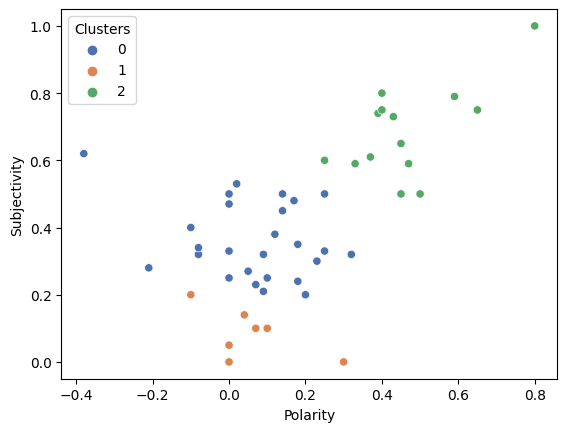

In [66]:
data['Clusters'] = km.labels_
sns.scatterplot(x="Polarity", y="Subjectivity",hue = 'Clusters',  data=data,palette='deep')


In [67]:
data.head(10)

,Unnamed: 0,Tweets,Polarity,Subjectivity,Clusters
0,0,"Modi @9\n9 Years of Sewa, Sushasan, & Garib Ka...",0.10,0.25,0
1,1,"Here are ....\n\n1. Swachh Bharat Abhiyan (""Cl...",0.18,0.35,0
2,2,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00,1
3,3,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00,1
4,4,The Atmanirbhar Bharat Abhiyan has encouraged ...,0.00,0.00,1
5,5,"The remarkable progress of the Indian economy,...",0.32,0.32,0
6,6,and urban landscapes. The Atmanirbhar Bharat A...,0.07,0.10,1
7,7,Dairy schemes\nDAIRY INFRASTRUCTURE. DEVELOPME...,0.00,0.25,0
8,8,🔹Pradhan Mantri Atmanirbhar Bharat Abhiyan (AB...,0.00,0.00,1
9,9,@pintukirtijain1 @ranakshrana @Kesariya_Meenu ...,0.10,0.10,1


In [68]:
data['Clusters'].value_counts()

1    39
0    26
2    19
Name: Clusters, dtype: int64

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
del data['Tweets']
X=data.drop('Clusters',axis=1).values
y = data['Clusters'].values

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [73]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [74]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [75]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.97

In [76]:
confusion_matrix(y_test, y_pred)

array([[7, 0, 0],
       [0, 9, 0],
       [0, 0, 1]])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         1

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

